## *Data: Feature extraction, and visualization*

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

In [27]:
df=pd.read_csv("listings (1).csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,334127,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,1702034,Mette,NaN,Vesterbro-Kongens Enghave,55.67059,12.55651,Entire home/apt,1401,4,118,2022-09-11,0.87,1,42,5,NaN
1,338928,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,113348,Samy,NaN,Nrrebro,55.69388,12.54725,Entire home/apt,793,5,92,2023-03-22,0.69,1,5,4,NaN
2,338992,Rental unit in Copenhagen · ★4.58 · 2 bedrooms...,799887,Bente,NaN,Vesterbro-Kongens Enghave,55.67365,12.55581,Private room,1000,1,378,2022-09-26,2.75,3,0,2,NaN
3,6983,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,16774,Simon,NaN,Nrrebro,55.68641,12.54741,Entire home/apt,803,3,173,2023-01-02,1.03,1,0,1,NaN
4,339126,Rental unit in Copenhagen · ★4.88 · 2 bedrooms...,1589153,Michael & Bille Max,NaN,Vesterbro-Kongens Enghave,55.67284,12.54717,Entire home/apt,2400,2,77,2023-06-19,0.57,1,128,14,NaN


In [3]:
df.shape

(17027, 18)

In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

In [28]:
df=df.drop(columns=['neighbourhood_group','license','id','host_id','host_name','calculated_host_listings_count','last_review', 'reviews_per_month', 'number_of_reviews_ltm'])    #drop non-desired columns


In [29]:
#We remove rows which have price=0, since no one is legally renting for free
df.drop(df[df['price'] == 0].index, inplace=True)

In [30]:
df

,name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,availability_365
0,Rental unit in Copenhagen · ★4.88 · 1 bedroom ...,Vesterbro-Kongens Enghave,55.670590,12.556510,Entire home/apt,1401,4,118,42
1,Rental unit in Copenhagen · ★4.91 · 1 bedroom ...,Nrrebro,55.693880,12.547250,Entire home/apt,793,5,92,5
2,Rental unit in Copenhagen · ★4.58 · 2 bedrooms...,Vesterbro-Kongens Enghave,55.673650,12.555810,Private room,1000,1,378,0
3,Rental unit in Copenhagen · ★4.78 · 1 bedroom ...,Nrrebro,55.686410,12.547410,Entire home/apt,803,3,173,0
4,Rental unit in Copenhagen · ★4.88 · 2 bedrooms...,Vesterbro-Kongens Enghave,55.672840,12.547170,Entire home/apt,2400,2,77,128
...,...,...,...,...,...,...,...,...,...
17022,Guest suite in Copenhagen · ★New · 2 bedrooms ...,Amager st,55.645392,12.633822,Entire home/apt,1260,1,0,362
17023,Rental unit in Copenhagen · ★New · 2 bedrooms ...,Amager Vest,55.666826,12.581515,Entire home/apt,1600,4,0,54
17024,Rental unit in Copenhagen · ★New · 1 bedroom ·...,sterbro,55.710625,12.571924,Entire home/apt,408,1,0,239
17025,Rental unit in Frederiksberg · ★New · 1 bedroo...,Frederiksberg,55.693516,12.535378,Entire home/apt,950,5,0,16


Here we perform data parsing for column 'name', transforming it into 'type,rating,bed,bedroom,bath' columns. Also, we make sure that datatypes for newly created columns are correct.

In [31]:
#extract the information/datatype from the 'name' column
df['type'] = df['name'].str.extract(r'^(.*?)\s*[\d.]+')
#extract the rating and convert to numeric
rating_format1 = df['name'].str.extract(r'(\d+\.\d+)')  #rating format "x.x"
rating_format2 = df['name'].str.extract(r'(\d+\.\d+)\/')  #rating format "x.x/"
df['rating'] = pd.to_numeric(rating_format1.fillna(rating_format2)[0], errors='coerce')
#extract the num of bed,bedrooms, baths
df['bedroom'] = df['name'].str.extract(r'(\d+)\s+bedroom')  # Extracts the number of bedrooms
df['bed'] = df['name'].str.extract(r'(\d+)\s+bed')  # Extracts the number of beds
df['bath'] = df['name'].str.extract(r'(\d+)\s+bath')  # Extracts the number of baths
#convert the columns to the appropriate data types (int - since it's num of bed,bedrooms, baths)
df['bedroom'] = pd.to_numeric(df['bedroom'], errors='coerce')
df['bed'] = pd.to_numeric(df['bed'], errors='coerce')
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')
#drop 'name' column
df.drop(columns=['name'], inplace=True)

In [32]:
print(df)

                   neighbourhood   latitude  longitude        room_type  \
0      Vesterbro-Kongens Enghave  55.670590  12.556510  Entire home/apt   
1                        Nrrebro  55.693880  12.547250  Entire home/apt   
2      Vesterbro-Kongens Enghave  55.673650  12.555810     Private room   
3                        Nrrebro  55.686410  12.547410  Entire home/apt   
4      Vesterbro-Kongens Enghave  55.672840  12.547170  Entire home/apt   
...                          ...        ...        ...              ...   
17022                  Amager st  55.645392  12.633822  Entire home/apt   
17023                Amager Vest  55.666826  12.581515  Entire home/apt   
17024                    sterbro  55.710625  12.571924  Entire home/apt   
17025              Frederiksberg  55.693516  12.535378  Entire home/apt   
17026  Vesterbro-Kongens Enghave  55.671265  12.561190  Entire home/apt   

       price  minimum_nights  number_of_reviews  availability_365  \
0       1401               4  

In [12]:
#I think that we should separate name column, and then perform statistics, but I'll add summary statistics code anyway

In [36]:
#Also I let's add  Rating from the name column once it's split up
print(df[['price','minimum_nights','number_of_reviews','availability_365','rating','bedroom','bed','bath']].describe())

               price  minimum_nights  number_of_reviews  availability_365  \
count   17026.000000    17026.000000       17026.000000      17026.000000   
mean     1261.128216        4.506402          17.446200         85.990133   
std      1868.713852       15.433967          39.017039        115.198134   
min       120.000000        1.000000           0.000000          0.000000   
25%       799.000000        2.000000           1.000000          0.000000   
50%      1000.000000        3.000000           6.000000         18.000000   
75%      1401.000000        4.000000          18.000000        160.000000   
max    150364.000000     1111.000000        1178.000000        365.000000   

             rating       bedroom           bed          bath  
count  12004.000000  16799.000000  17023.000000  15405.000000  
mean       4.695928      1.640038      1.637902      1.370140  
std        0.646543      0.910912      0.911358      1.078443  
min        0.000000      1.000000      1.000000   

In [35]:
#If we're missing values in one of these filtered columns
if df['rating'].isna().any():
    print(f"Column has missing values.")
else:
    print(f"Column has no missing values. Returning 0.")

Column has missing values.


Pearson correlation heatmap, to investigate the connection of price with other attributes.

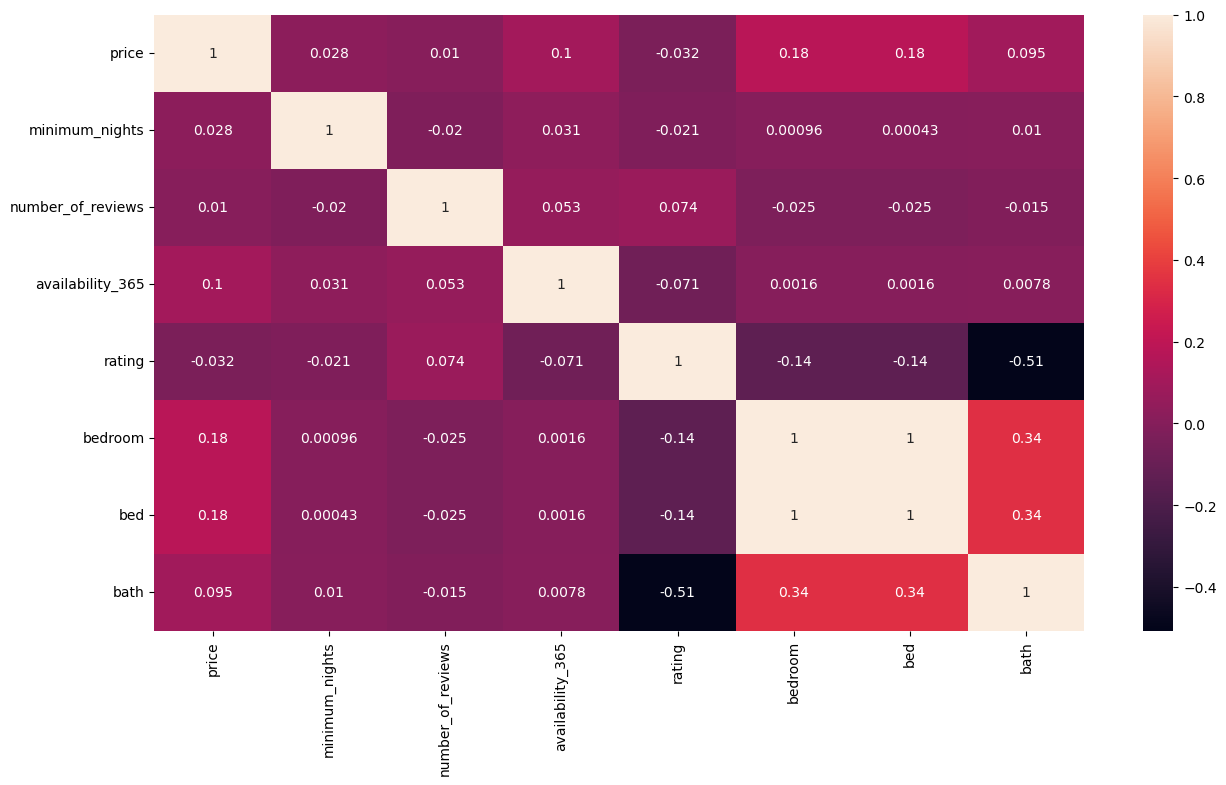

In [38]:
df_cor=df[['price','minimum_nights','number_of_reviews','availability_365','rating','bedroom','bed','bath']]
plt.figure(figsize=(15,8))
sb.heatmap(df_cor.corr(method="pearson"), annot=True, annot_kws={"size":10})
plt.show()